# Model Development

Pengembangan model untuk memprediksi harga (price) dengan beberapa variabel atau features. Tujuannya untuk memprediksi nilai wajar atau harga dari sebuah mobil

Dengan Data analytics, pengembangan model yang digunakan untuk memprediksi future dengan melihat hubungan antar variabel dan pengaruhnya terhadap model prediksi

In [1]:
# Melakukan import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mengimport file csv

import pandas as pd

import csv
df = pd.read_csv('clean_df.csv', index_col=0)

In [3]:
df.head()

,symbolling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,27,13495,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,27,16500,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,26,16500,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,30,13950,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,22,17450,Low,0,1,1,0


## Linear Regression 

In [4]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
x = df[["highway-L/100km"]]
y = df["price"]

lm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
y_ = lm.predict(x)
y_[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [7]:
a = lm.intercept_
print("Nilai intersep adalah:", a)

b = lm.coef_
print("Nilai slope adalah:", b)

Nilai intersep adalah: 38423.3058581574
Nilai slope adalah: [-821.73337832]


Jadi model atau persamaan untuk prediksi harga adalah 

Price = 38423.3058581574 - 821.73337832(x=highway-L/100km)

## Multiple Linear Regression

Menggunakan beberapa variabel untuk memprediksi harga (price)
variabel yang digunakan yaitu :
<ul>
    <li>Hoursepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-L/100KM</li>
  </ul>

In [8]:
# Memasukkan variabel prediktor ke dalam model

z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

lm.fit(z, df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
a = lm.intercept_
print("Nilai intersep adalah:", a)

b = lm.coef_
print("Nilai slope adalah:", b)

Nilai intersep adalah: -15811.86376772925
Nilai slope adalah: [53.53022809  4.70805253 81.51280006 36.1593925 ]



Model  untuk  prediksi  harga  yaitu 

$$
Y = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<b>Price</b> = -15811.86376772925 + 53.53022809(<b>horsepower</b>) +  4.70805253(<b>curb-weight</b>)) + 81.51280006(<b>engine-size</b>) + 36.1593925(<b>highway-L/100km</b>)

## Evaluasi Model dengan visualisasi

In [10]:
# Import library

import seaborn as sns
%matplotlib inline

(0, 49677.055450711436)

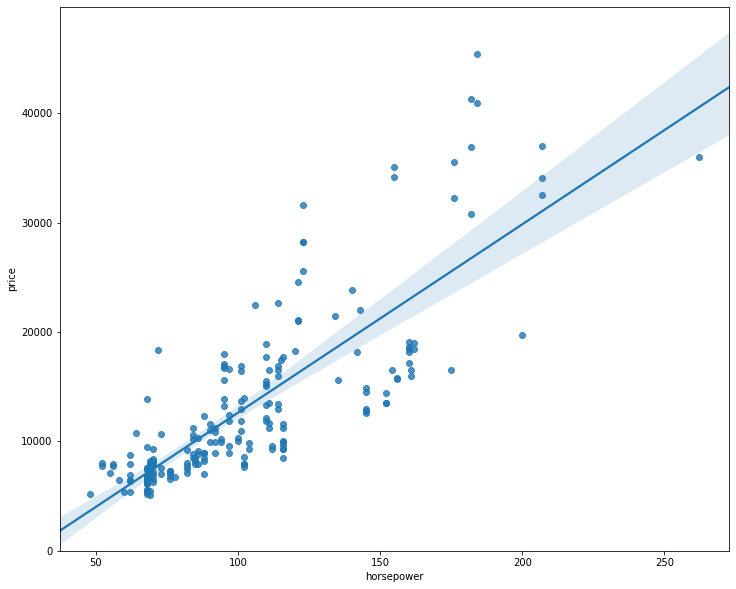

In [11]:
# Visualisasi variabel horsepower untuk prediksi harga

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='horsepower', y='price', data=df)
plt.ylim(0,)

(0, 47422.919330307624)

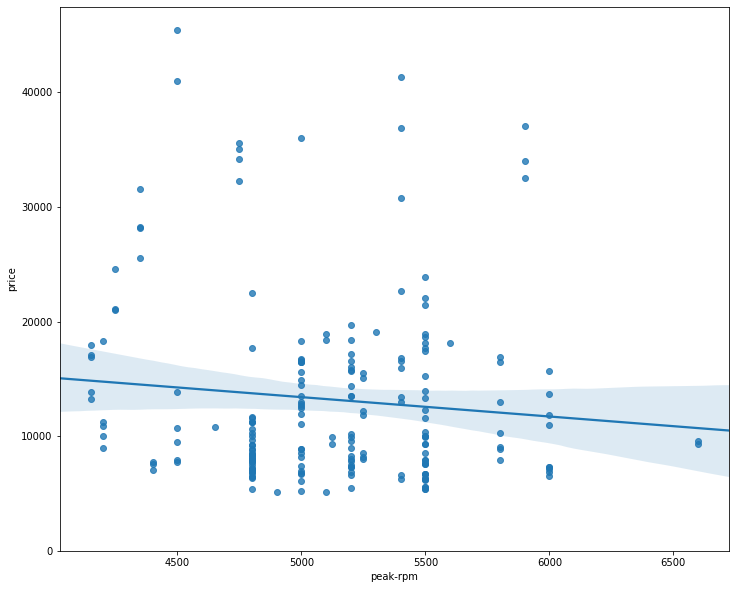

In [12]:
# Visualisasi variabel peak-rpm untuk prediksi harga

plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

### Membuat distribution plot

In [13]:
y_ = lm.predict(z)

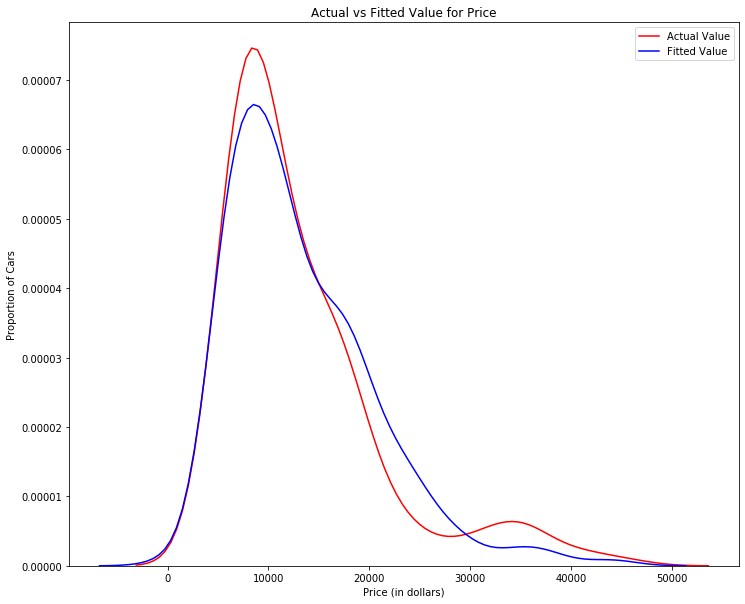

In [14]:
# Membandingkan hasil prediksi dengan nilai aktual

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_, hist=False, color="b", label="Fitted Value", ax=ax1)

plt.title('Actual vs Fitted Value for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Polinomial Regression dan Pipelines

Polinomial ini untuk melihat hubungan non-linier dengan mengkuadratkan variabel prediktor
</br>
</br>



<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$


In [15]:
# Menggunakan function untuk plot data

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [16]:
x = df['highway-L/100km']
y = df['price']

In [17]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


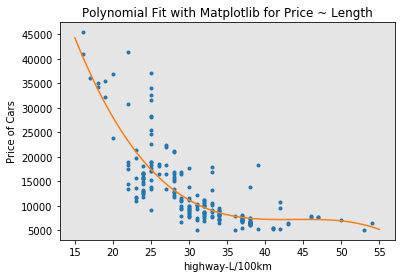

In [18]:
PlotPolly(p, x, y, 'highway-L/100km')

In [19]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

### Tranformasi polinomial pada variabel

In [20]:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [21]:
z_pr=pr.fit_transform(z)
z.shape

(201, 4)

In [22]:
z_pr.shape

(201, 15)

### Pipeline


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [25]:
pipe.fit(z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [26]:
ypipe=pipe.predict(z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

### Pengukuran pada evaluasi sampel

<p> Ada dua pengukuran penting untuk menentukan akurasi model yaitu: </p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li></ul>
    
<b>R-squared</b>

<p>R squared, atau koefisien determinasi, untuk mengukur seberapa fit data dengan model regresi.</p>
    
<p>Nilai R-squared adalah persentase variasi dari variabel prediktor dalam menjelaskan model linier.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error mengukur rata-rata dari squares of errors, yang memperlihatkan perbedaan antara nilai aktual (y) dan nilai estimasi (ŷ).</p>

In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'], y_)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  11979300.349818882


In [53]:
# fit the model 
lm.fit(z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(z, df['price']))

The R-square is:  0.8093732522175299


In [55]:
Y_predict_multifit = lm.predict(z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.349818882


In [57]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906515


In [58]:
mean_squared_error(df['price'], p(x))

20474146.42636124

### Decision Making: Menentukan model fit yang baik

1. model dengan nilai R-squared yang tinggi merupakan model yang fit untuk data
</br>
2. model dengan nilai MSE yang kecil menunjukkan model fit untuk dat

Simple Linear Regression: Menggunakan Highway-L/100km sebagai prediktor variabel harga (price)
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>

Multiple Linear Regression: Menggunakan Horsepower, Curb-weight, Engine-size, and Highway-L/100km sebagai prediktor variabel harga (price)
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>

Polynomial Fit: Menggunakan Highway-L/100km ebagai prediktor variabel harga (price)
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li> MSE: 2.05 x 10^7</li>
</ul>


Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR) vs Polynomial Fit

Setelah membandingkan ketiga model. Maka model yang terbaik addalah <b>Multiple Linear Regression model (MLR)</b> dalam memprediksi harga (price) pada dataset.